Assignment 1: Handling Missing Data in an E-Commerce Orders Dataset
Objective:
To analyze and clean an e-commerce dataset by identifying and handling missing values using various imputation techniques.
Instructions:
Load the provided dataset into Pandas.
Identify missing data:
Use isna() and info() functions to detect missing values.
Compute the percentage of missing values for each column.
Analyze missing data patterns:
Determine whether data is MCAR, MAR, or MNAR.
Visualize missing data patterns using seaborn.heatmap().
Handle missing values:
Apply different imputation techniques:
Mean/Median imputation for numerical columns (e.g., Product_Price).
Mode imputation for categorical columns (e.g., Product_Category).
Forward fill or backward fill for date-related fields.
K-Nearest Neighbors (KNN) imputation for complex cases.
Evaluate the impact:
Compare summary statistics before and after imputation.
Visualize the imputed values using histograms or boxplots.
Prepare a report:
Document findings, methods used, and final observations.
Submit a Jupyter Notebook with the cleaned dataset.


C:\Users\dhari\AppData\Local\Temp\ipykernel_18756\2439489273.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Customer_Age'].fillna(df['Customer_Age'].median(), inplace=True)
C:\Users\dhari\AppData\Local\Temp\ipykernel_18756\2439489273.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

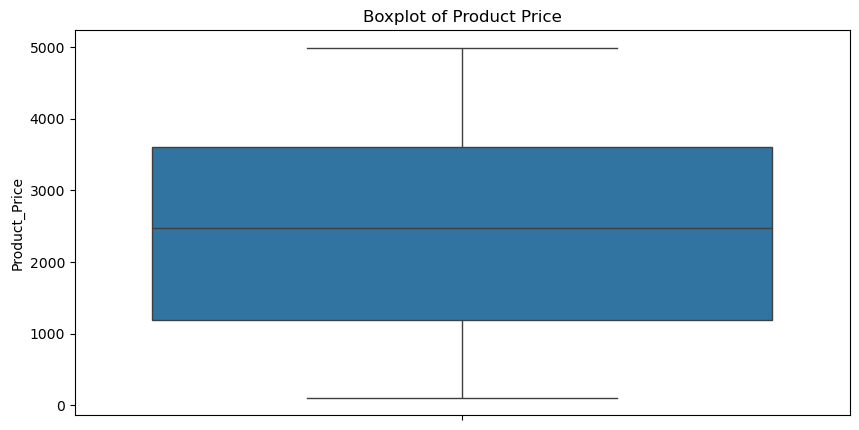

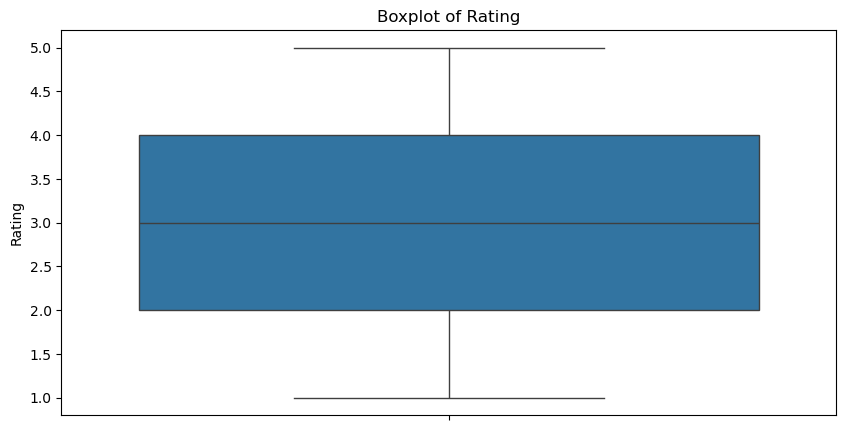

Data cleaning and preparation complete. Cleaned data saved to cleaned_dataset.csv


In [5]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Download necessary NLTK resources (do this once)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)



def clean_and_prepare_data(df):
    """Cleans and prepares e-commerce customer review data."""

    # 1. Handle Missing Values
    # Impute numerical missing values (example: Customer_Age) with median
    df['Customer_Age'].fillna(df['Customer_Age'].median(), inplace=True)

    # NLP-based imputation for missing Review_Text (example: fill with "No Review")
    df['Review_Text'].fillna("No Review", inplace=True)  # Or more sophisticated methods

    # Drop rows where Rating is missing (essential for analysis)
    df.dropna(subset=['Rating'], inplace=True)


    # 2. Detect and Remove Duplicates
    df.drop_duplicates(inplace=True)  # Keep first occurrence by default

    # 3. Handle Inconsistent Data
    # Standardize Rating (important: convert to numeric first)
    df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')  # Handle non-numeric ratings
    df = df[(df['Rating'] >= 1) & (df['Rating'] <= 5)] #Filter ratings between 1 and 5


    # Correct spelling inconsistencies in Product_Category (example)
    # This requires careful inspection and a mapping of incorrect to correct values.
    # Example (replace with your specific corrections):
    category_mapping = {
        'Electronics ': 'Electronics',  # Trim whitespace
        'Clothings': 'Clothing',
        'Books ': 'Books',
        # ... more mappings
    }
    df['Product_Category'] = df['Product_Category'].replace(category_mapping)

    # 4. Handle Outliers (Product_Price and Rating)
    # Boxplot visualization (optional, but recommended for analysis)
    plt.figure(figsize=(10, 5))
    sns.boxplot(y=df['Product_Price'])
    plt.title('Boxplot of Product Price')
    plt.show()

    plt.figure(figsize=(10, 5))
    sns.boxplot(y=df['Rating'])
    plt.title('Boxplot of Rating')
    plt.show()


    # Outlier handling for Product_Price (example: IQR method)
    Q1 = df['Product_Price'].quantile(0.25)
    Q3 = df['Product_Price'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df['Product_Price'] = np.clip(df['Product_Price'], lower_bound, upper_bound) #Capping Outliers

    # 5. Prepare Cleaned Data for Analysis
    # Text Preprocessing for Review_Text
    df['Review_Text'] = df['Review_Text'].str.lower() #Lowercase
    df['Review_Text'] = df['Review_Text'].apply(remove_punctuation) #Removing Punctuation
    df['Review_Text'] = df['Review_Text'].apply(remove_stopwords) #Removing Stopwords
    df['Review_Text'] = df['Review_Text'].apply(lemmatize_text) #Lemmatization

    # Convert categorical data to numerical (example: Product_Category)
    label_encoder = LabelEncoder()
    df['Product_Category'] = label_encoder.fit_transform(df['Product_Category'])


    return df

def remove_punctuation(text):
    return re.sub(r'[^\w\s]', '', text)

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    return " ".join([word for word in text.split() if word not in stop_words])

def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])


# Example usage (replace 'your_dataset.csv' with your file path):
df = pd.read_csv('your_dataset.csv')
cleaned_df = clean_and_prepare_data(df.copy()) #Create a Copy to avoid SettingWithCopyWarning

# Save the cleaned dataset
cleaned_df.to_csv('cleaned_dataset.csv', index=False)

print("Data cleaning and preparation complete. Cleaned data saved to cleaned_dataset.csv")